In [44]:
# Data Research

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

DIR = './organized_dataset/'

SHORT_TERM = 6

df = pd.read_csv(DIR+'feature_engineered_full.csv',header=0)

print('Data loaded')

Data loaded


## Number of Records

In [ ]:
print('# of records: ', df.shape[0])
print('# of default records: ', df[df['STATUS']==1].shape[0])

""" Result (Full)
# of records:  1266792
# of default records:  39012
"""

## Distribution of sequence length(Code)

In [ ]:
cid_set = set(df.loc[:,'CID'])
print('# of CID: ',len(cid_set))

temp = df.groupby('CID').count().iloc[:,:2]
temp.rename(columns={temp.columns[0]:'length'}, inplace=True)
# print(temp)
c = temp.groupby('length').count().iloc[:,0]
print(c)
print('SUM: ',c.sum())

print('Done')

""" Result (Full)
length  count
1       162
2       177
3       185
4       206
5       200
6       192
7       234
8       214
9       191
10      244
11      260
12      300
13      264
14      288
15      235
16      247
17      278
18      269
19      265
20      296
21      312
22      301
23      328
24      965
25      733
26      659
27      681
28      874
29      889
30      987
31      999
32     1045
33     1110
34     1074
35    25662
Name: DATE, dtype: int64
SUM:  41326
"""

## Num of default records per one customer

In [ ]:
cid_set = set(df[df['STATUS']==1].loc[:,'CID'])
print('# of CID with at least one default record: ',len(cid_set))

temp = df[df['STATUS']==1].groupby('CID').count().iloc[:,:]
temp.rename(columns={temp.columns[0]:'num of default records'}, inplace=True)
# print(temp)
c = temp.groupby('num of default records').count().iloc[:,0]
print(c)
print('SUM: ',c.sum())
print('Done')

""" Result (Full)
# of CID with at least one default record:  7468
# of default records, num of custmers
1     2192
2     1119
3      745
4      527
5      438
6      324
7      309
8      279
9      225
10     190
11     170
12     143
13     124
14     110
15      84
16      89
17      72
18      49
19      56
20      47
21      39
22      27
23      25
24      18
25      17
26      16
27       8
28      12
29       1
30       4
31       4
33       3
34       2
Name: DATE, dtype: int64
SUM:  7468
Done
"""

## How many default in short-term

In [ ]:
cid_set = set(df.loc[:,'CID'])
print('# of CID: ',len(cid_set))

# get length of each CID
temp = df.groupby('CID').count().loc[:,:]
temp.rename(columns={temp.columns[0]:'length'}, inplace=True)
temp = temp[temp['length']<SHORT_TERM].iloc[:,:2]
print('# of short-term CID: ',temp.shape[0])

short_cid_list = list(temp.index.values)

count_default = 0
count_record = 0
for cid in short_cid_list:
  temp = df[df['CID']==cid]
  temp2 = temp[temp['STATUS']==1]
  count_record += temp.shape[0]
  count_default += temp2.shape[0]

print('# of short-term records: ',count_record)
print('# of default happened in short-term: ',count_default)
print('Default Rate (short-term): ',count_default/count_record)
print('Done')

""" Result (Full)
# of CID:  41326
# of short-term CID:  930
# of short-term records:  2895
# of default happened in short-term:  106
Default Rate (short-term):  0.036614853195164075
"""

## How many default in long-term

In [ ]:
cid_set = set(df.loc[:,'CID'])
print('# of CID: ',len(cid_set))

# get length of each CID
temp = df.groupby('CID').count().loc[:,:]
temp.rename(columns={temp.columns[0]:'length'}, inplace=True)

temp = temp[temp['length'] >= SHORT_TERM].iloc[:,:2]
print('# of long-term CID: ',temp.shape[0])

short_cid_list = list(temp.index.values)

count_default = 0
count_record = 0
for cid in short_cid_list:
  temp = df[df['CID']==cid]
  temp2 = temp[temp['STATUS']==1]
  count_record += temp.shape[0]
  count_default += temp2.shape[0]

print('# of long-term records: ',count_record)
print('# of default happened in long-term: ',count_default)
print('Default Rate (long-term): ',count_default/count_record)
print('Done')

""" Result (Full)
# of CID:  41326
# of long-term CID:  40396
# of long-term records:  1263897
# of default happened in long-term:  38906
Default Rate (long-term):  0.030782571681078442
"""

## Default Rate distribution

# of CID:  41326
# of long-term CID:  162
# of long-term CID:  177
# of long-term CID:  185
# of long-term CID:  206
# of long-term CID:  200
# of long-term CID:  192
# of long-term CID:  234
# of long-term CID:  214
# of long-term CID:  191
# of long-term CID:  244
# of long-term CID:  260
# of long-term CID:  300
# of long-term CID:  264
# of long-term CID:  288
# of long-term CID:  235
# of long-term CID:  247
# of long-term CID:  278
# of long-term CID:  269
# of long-term CID:  265
# of long-term CID:  296
# of long-term CID:  312
# of long-term CID:  301
# of long-term CID:  328
# of long-term CID:  965
# of long-term CID:  733
# of long-term CID:  659
# of long-term CID:  681
# of long-term CID:  874
# of long-term CID:  889
# of long-term CID:  987
# of long-term CID:  999
# of long-term CID:  1045
# of long-term CID:  1110
# of long-term CID:  1074
# of long-term CID:  25662


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


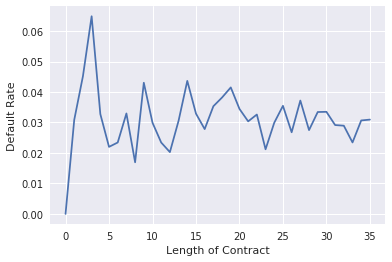

In [55]:
cid_set = set(df.loc[:,'CID'])
print('# of CID: ',len(cid_set))

# get length of each CID
length_df = df.groupby('CID').count().loc[:,:]
length_df.rename(columns={length_df.columns[0]:'length'}, inplace=True)

num_of_i_length_list = [0]
rate_of_i_length_list = [0]

for i in range(1,36):
  temp = length_df[length_df['length'] == i].iloc[:,:2]
  num_of_i_length_list.append(temp.shape[0])
  print('# of long-term CID: ',temp.shape[0])
  
  short_cid_list = list(temp.index.values)

  count_default = 0
  count_record = 0
  for cid in short_cid_list:
    temp = df[df['CID']==cid]
    temp2 = temp[temp['STATUS']==1]
    count_record += temp.shape[0]
    count_default += temp2.shape[0]

  rate_of_i_length_list.append(count_default/count_record)

plt.plot(rate_of_i_length_list)
plt.ylabel('Default Rate')
plt.xlabel('Length of Contract')
plt.show()

## ANN

In [ ]:
!python3 -u ./learn/learn_ann.py full > ./learn/ann_full_result.out

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2019-03-31 18:33:17.479406: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
